In [1]:
import numpy as np
import pygimli as pg
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle
from pygimli.viewer.mpl import draw1DColumn

In [2]:
dir='//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/'

30/01/25 - 08:46:16 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
30/01/25 - 08:46:16 - pyGIMLi - INFO - Create default mesh for geometric factor calculation.
30/01/25 - 08:46:23 - pyGIMLi - INFO - Save RVector binary
30/01/25 - 08:46:23 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\6097183116399544101


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1e71418f950>)

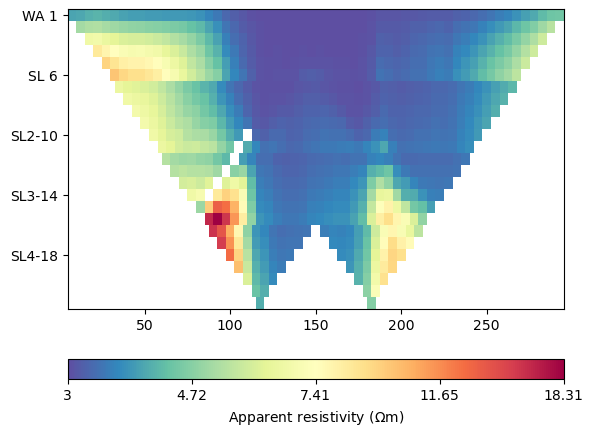

In [10]:
data = ert.load(dir+"from_metadata/ERT_data_western_amphibious_DAT_no_std_filter_dupavg.dat")
mgr = ert.ERTManager(data)
data.setSensorPositions(pg.meshtools.interpolateAlongCurve(data.additionalPoints(), pg.x(data)))
data['k'] = ert.createGeometricFactors(data, numerical=True)
data['err'] = ert.estimateError(data, relativeError=0.03, absoluteUError=5e-5)
ert.show(data, data['err']*100)

0 -10.000000000000002 -2.59586 0.0
1 -10.000000000000002 -123.26723191339975 0.0
2 304.71601131108963 -123.26723191339975 0.0
3 304.71601131108963 -5.380827388963895 0.0
4 -1188.8640452443585 -2.59586 0.0
5 -1188.8640452443585 -1299.3463097687943 0.0
6 1483.5800565554482 -5.380827388963895 0.0
7 1483.5800565554482 -1302.1312771577584 0.0
8 0.0 -2.59586 0.0
9 1.2496859021261466 -2.5678395427025276 0.0
10 3.74905770637844 -2.5117986281075826 0.0
11 4.998743608504586 -2.48377817081011 0.0
12 6.248564641657222 -2.462626971748795 0.0
13 8.748206707962492 -2.420324573626165 0.0
14 9.998027741115127 -2.39917337456485 0.0
15 11.246216441744759 -2.466418321090373 0.0
16 13.742593843004023 -2.6009082141414184 0.0
17 14.990782543633655 -2.6681531606669413 0.0
18 16.240455365698615 -2.6967024029205033 0.0
19 18.739801009828536 -2.753800887427627 0.0
20 19.989473831893495 -2.782350129681189 0.0
21 21.23936230852587 -2.765781667808728 0.0
22 23.739139261790626 -2.7326447440638058 0.0
23 24.989027738

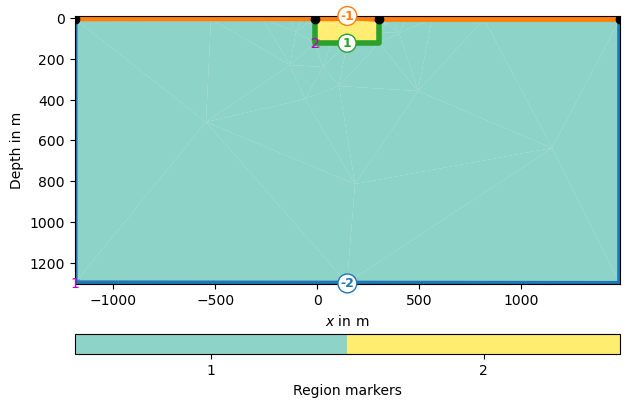

In [11]:
plc = mt.createParaMeshPLC(data,paraDX = 0.25, paraDZ= 0.25)
for i, n in enumerate(plc.nodes()[:]):
    #ax.text(n.x(), n.y(), str(i))
    print(i, n.x(), n.y(), n.z())
for nr, marker in enumerate(plc.regionMarkers()):
    print('Position marker number {}:'.format(nr + 1), marker.x(), marker.y(),
          marker.z())
ax, _ = pg.show(plc, markers=True)

(-50.0, 381.0)

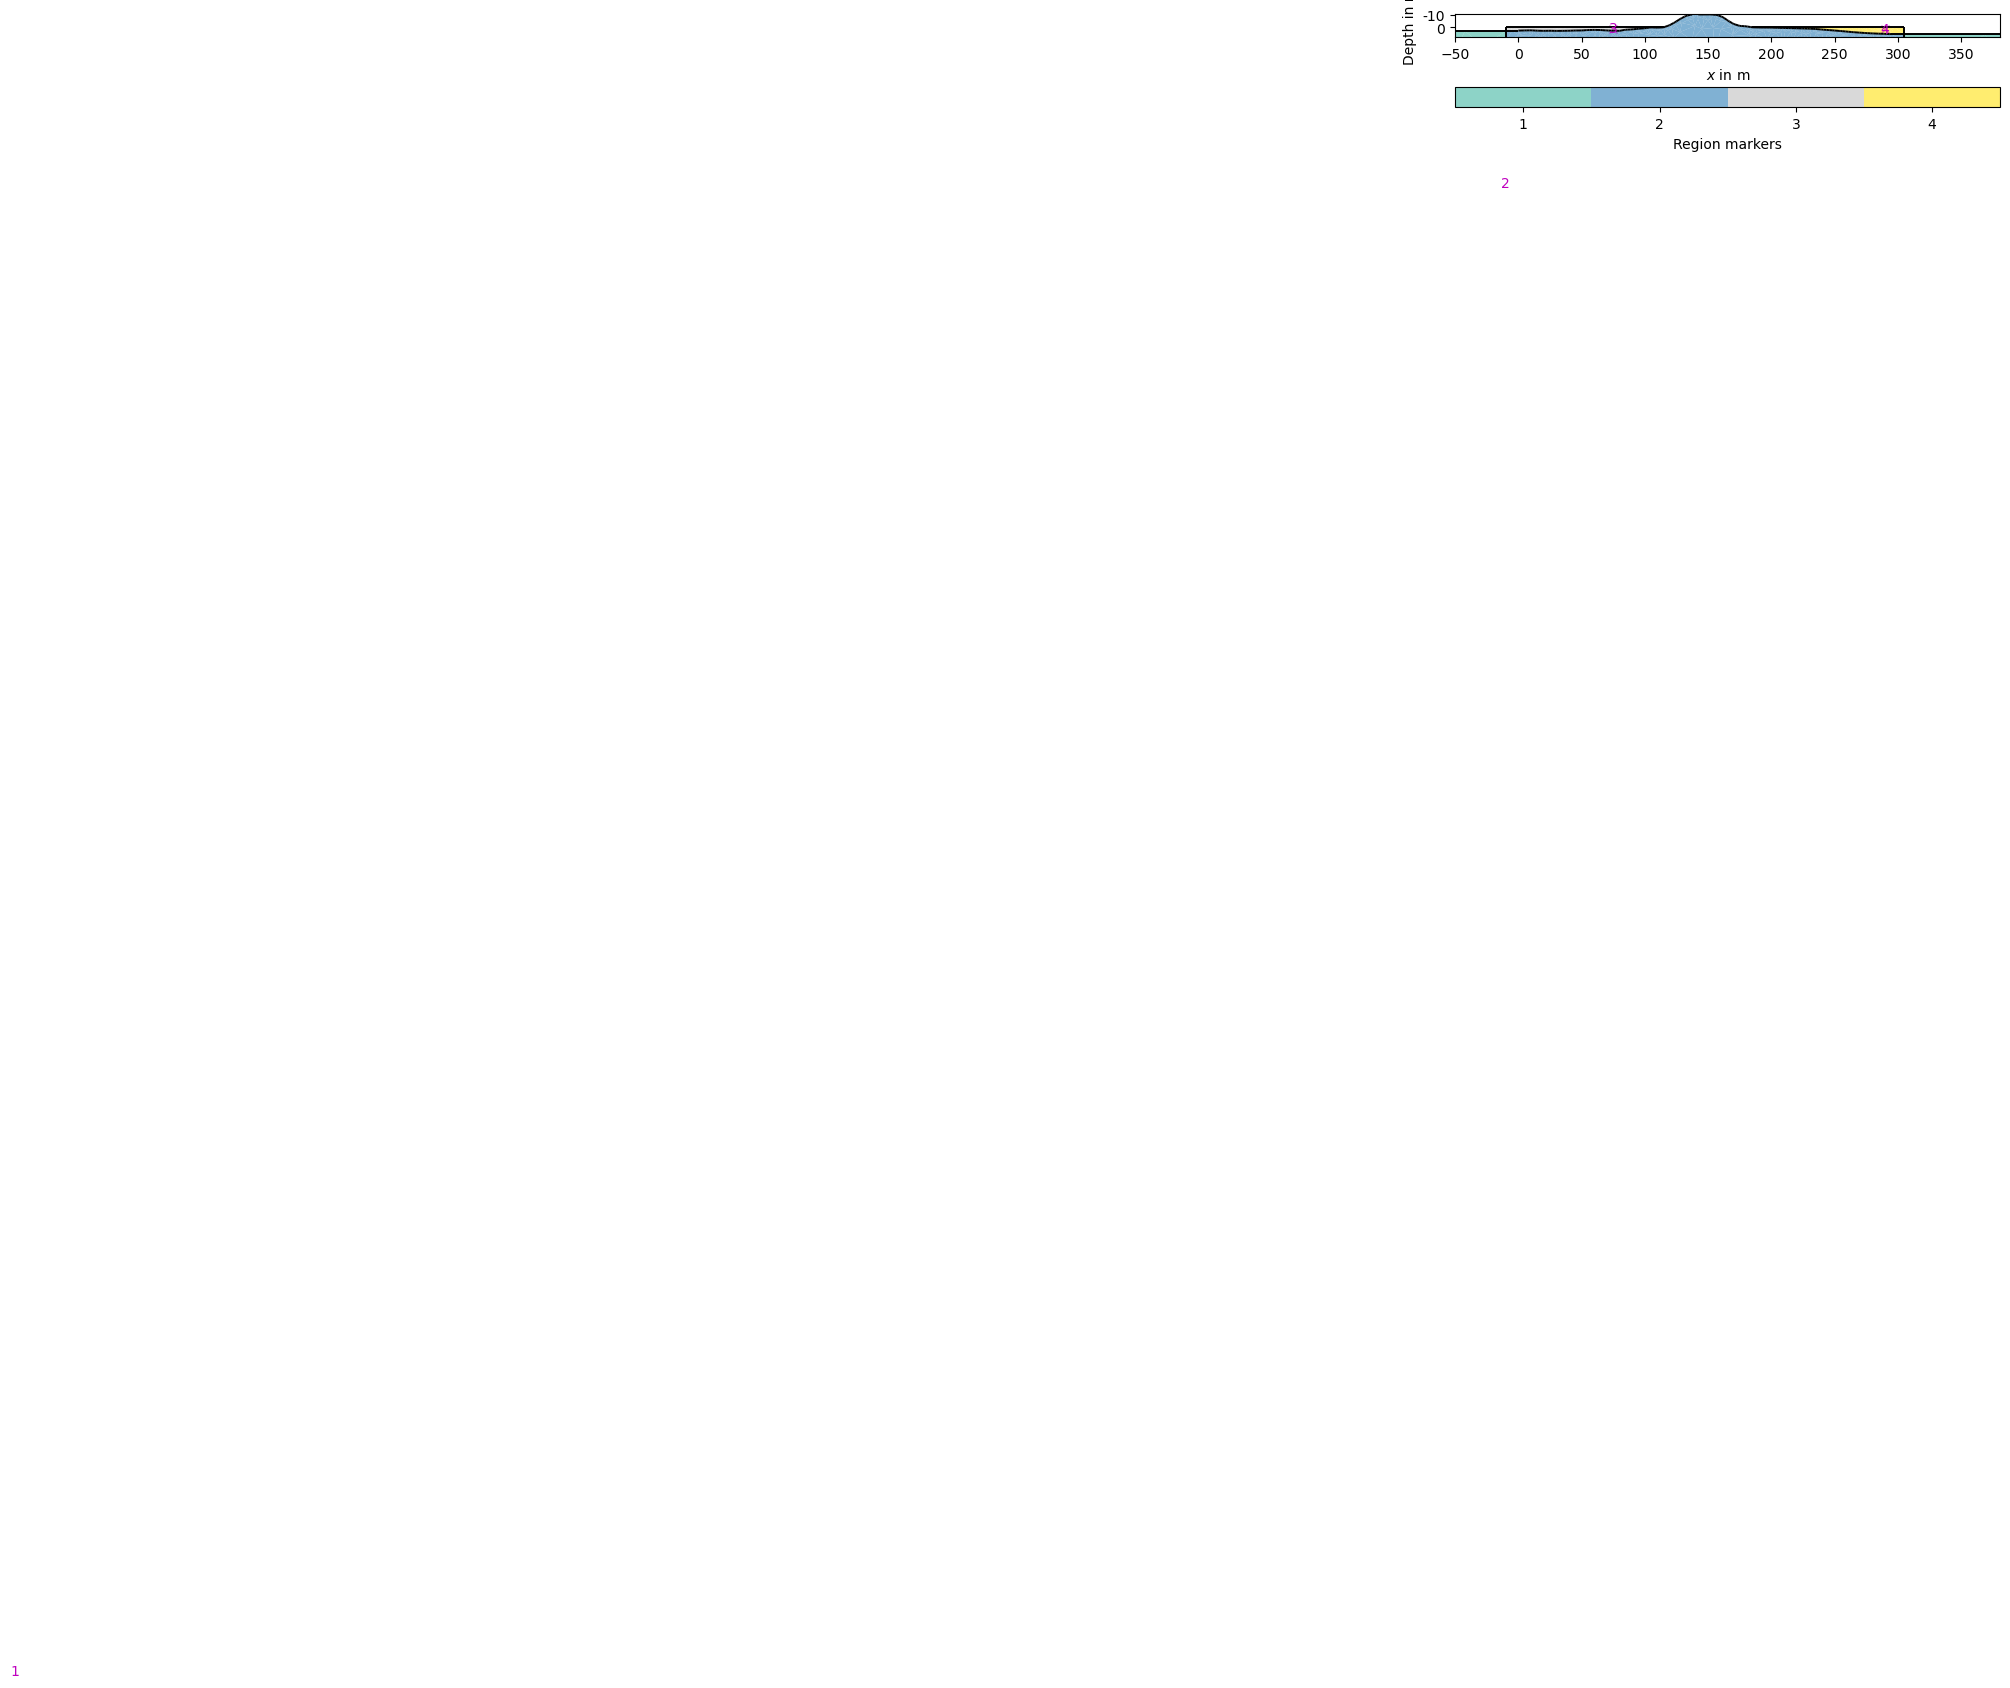

In [12]:
plc.createNode(-10.000000000000002, 0, 0, marker=189)
plc.createNode(115, 0, 0, marker=190)
plc.createNode(185, 0, 0, marker=191)
plc.createNode(304.71601495290366 , 0, 0, marker=192)

plc.createEdge(plc.node(189), plc.node(190), marker=-1)
plc.createEdge(plc.node(189), plc.node(0), marker=-1)
plc.createEdge(plc.node(191), plc.node(192), marker=-1)
plc.createEdge(plc.node(192), plc.node(3), marker=-1)

plc.addRegionMarker([75, -1], marker=3)  
plc.addRegionMarker([290, -1.5], marker=4)  

ax, _ = pg.show(plc, showMesh=True)
ax.set_ylim(-8)
ax.set_xlim(-50,381)

(-130.0, 381.0)

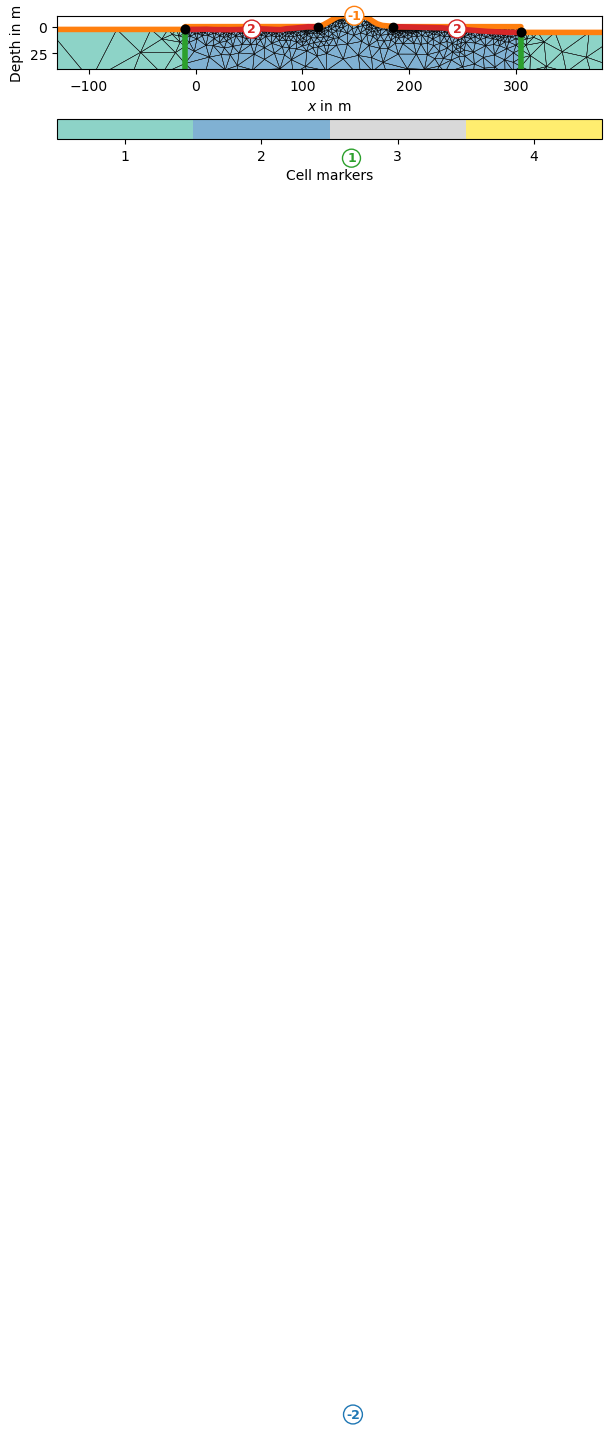

In [13]:
mesh = mt.createMesh(plc)
for b in mesh.boundaries():
    if b.marker() == -1 and not b.outside():
        b.setMarker(2)

#print(mesh)
ax, _ = pg.show(mesh, markers=True, showMesh=True)
ax.set_ylim(-40)
ax.set_xlim(-130,381)

07/02/25 - 09:08:47 - pyGIMLi - INFO - Found 4 regions.
07/02/25 - 09:08:47 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
07/02/25 - 09:08:47 - pyGIMLi - INFO - Creating forward mesh from region infos.
07/02/25 - 09:08:47 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
07/02/25 - 09:08:48 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 9127 Cells: 17352 Boundaries: 13464
07/02/25 - 09:08:48 - pyGIMLi - INFO - Use median(data values)=57.235
07/02/25 - 09:08:48 - pyGIMLi - INFO - Created startmodel from forward operator: 3186, min/max=57.235000/57.235000
07/02/25 - 09:08:48 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001E7151A3510>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001E78D9BF740>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000001E79B1521F0>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x000001E79B151CB0>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x000001E79B151BD0>
min/max (data): 1.1/1619
min/max (error): 3%/18.31%
min/max (start model): 57.23/57.23
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1700.94
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  469.56 (dPhi = 72.25%) lam: 40.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  127.63 (dPhi = 72.60%) lam: 40.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   27.25 (dPhi = 77.66%) lam: 40.0
-

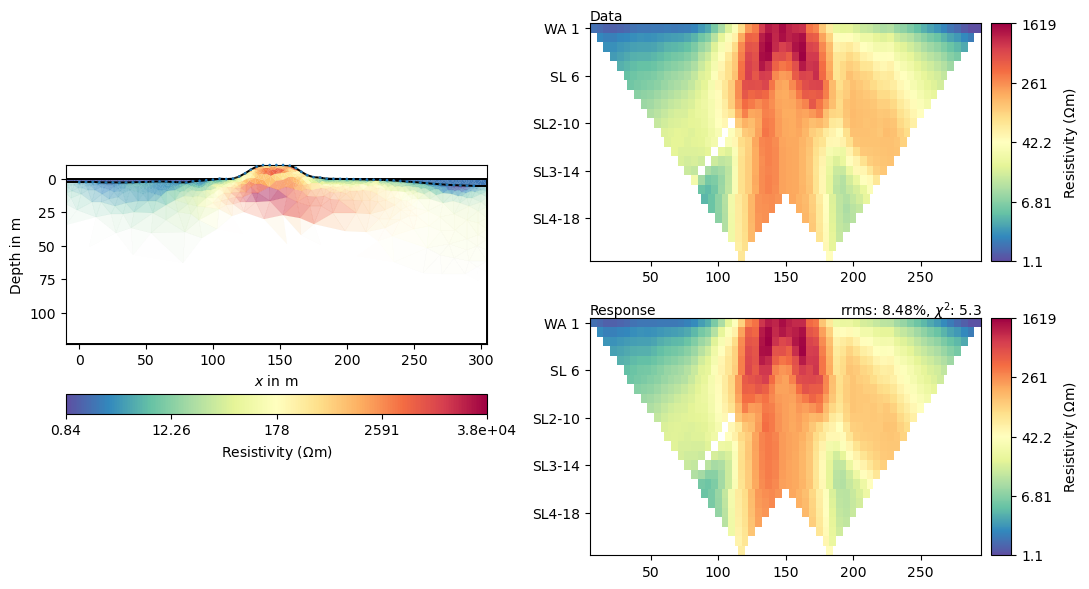

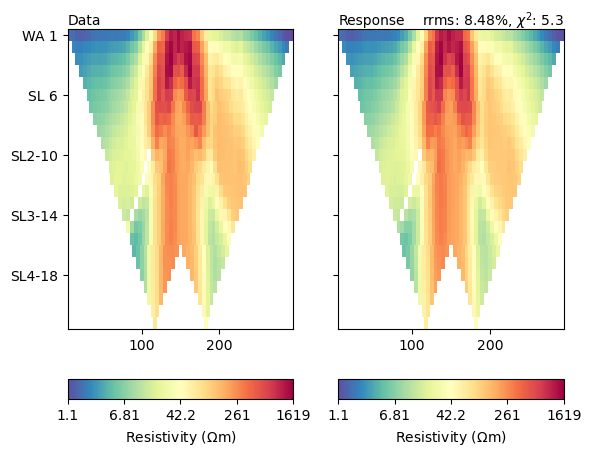

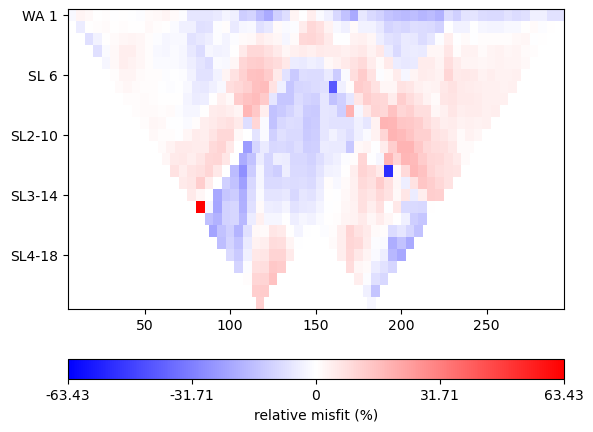

In [35]:
mgr.setMesh(mesh)


mgr.inv.setRegularization(limits=[0, 0], trans="log")
mgr.inv.setRegularization(3, single=True)
mgr.inv.setRegularization(4, single=True)
mgr.inv.setRegularization(2, zWeight=0.2)


mgr.invert(data, lam=40, verbose=True, paraDX = 0.25, paraDZ= 0.25)

mgr.showResultAndFit()
mgr.showFit()
mgr.showMisfit()

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1e7955861d0>)

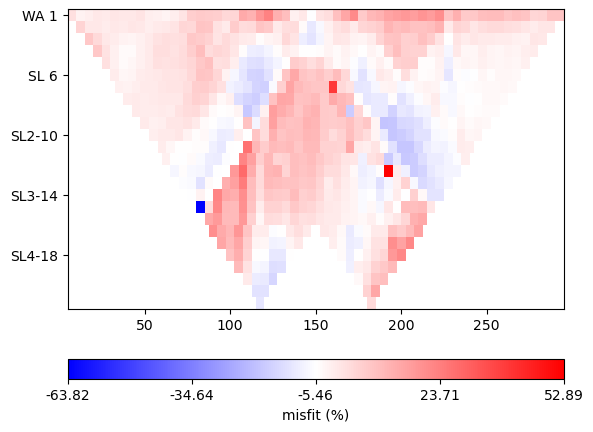

In [17]:
misfit = mgr.inv.response / mgr.data['rhoa'] * 100 - 100
pg.show(mgr.data, misfit, cMap="bwr", label="misfit (%)")  

07/02/25 - 09:21:28 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_western_new_rhoa_mike\ERTManager


Path //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_western_new_rhoa_mike\ERTManager already exists. Skipping


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_western_new_rhoa_mike\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

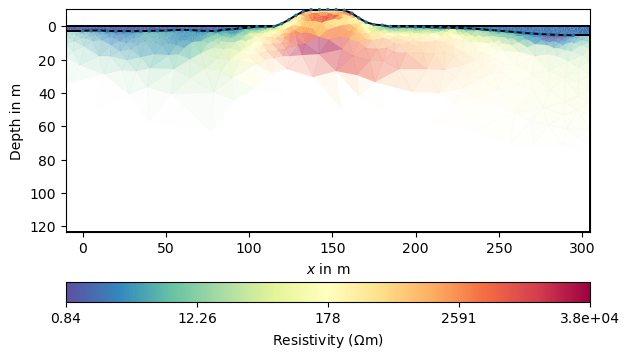

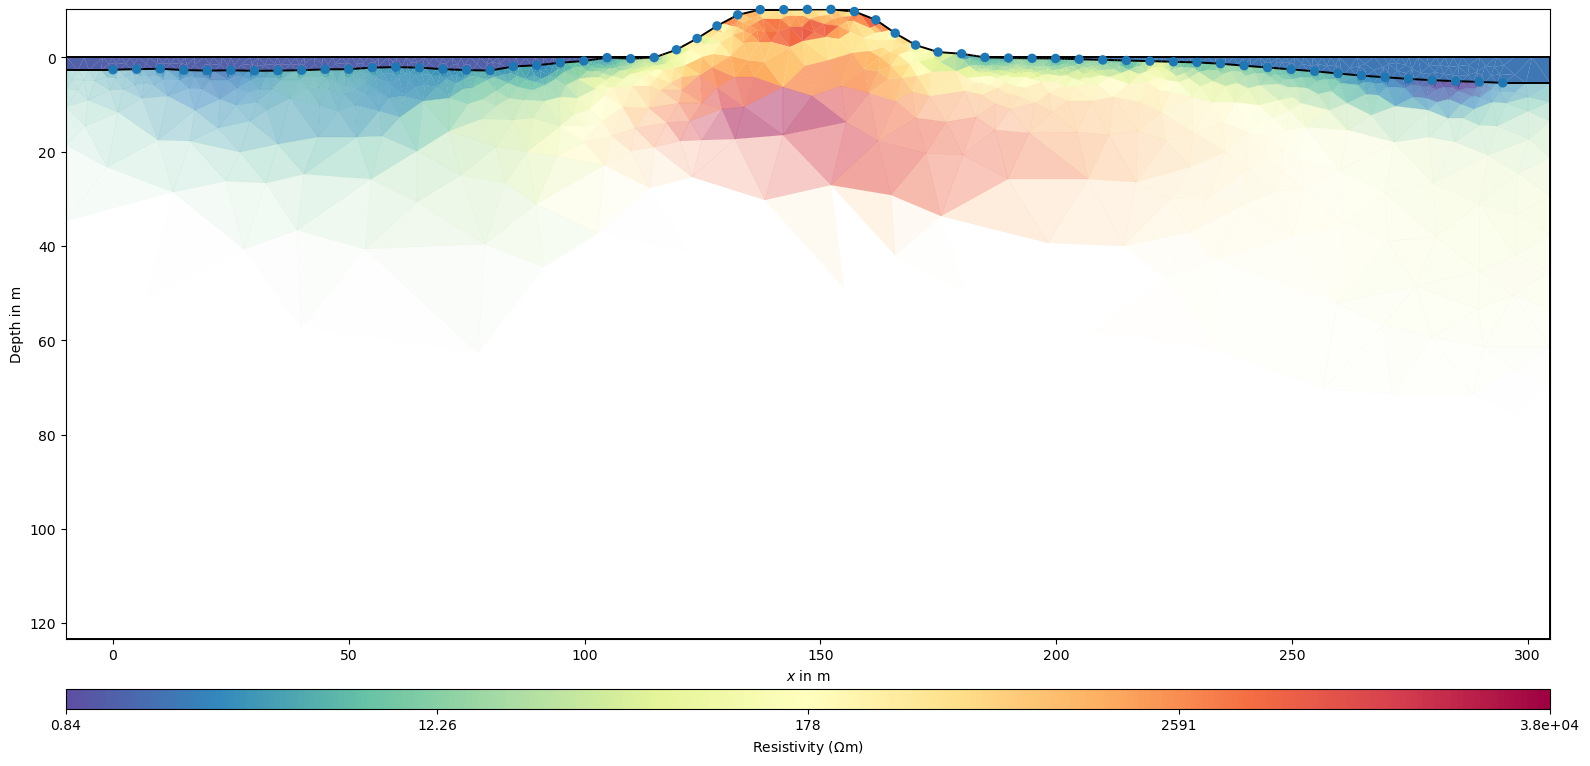

In [36]:
mgr.showResult()
mgr.saveResult(dir+ 'pygimli/all_inversions/INV_western_new_rhoa_mike')

In [37]:
with open(dir+'processing/shoreline/joined_west.pkl', 'rb') as f:
    joined_west = pickle.load(f)

In [38]:
westshore = joined_west[['year', 'xc', 'zc']].to_numpy()
westshore[:, 1] = westshore[:, 1].round(decimals=0)
westshore[:, 2] = westshore[:, 2].round(decimals=1)

In [39]:
posVec2 = [pg.Pos(pos) for pos in zip(westshore[:, 1], westshore[:, 2])]
para = pg.Mesh(mgr.paraDomain)
para.setCellMarkers(pg.IVector(para.cellCount()))



fopDP = PriorModelling(para, posVec2)


resMesh = fopDP(mgr.model)



cov = fopDP(mgr.coverage())

west_shoreline_plots = np.column_stack((westshore[:, 1], westshore[:, 2], resMesh, westshore[:, 0], cov))
west_shoreline_plots = np.c_[ west_shoreline_plots, 2023 - west_shoreline_plots[:, 3] ]
column_titles = "X,Y,ResMesh,Year,Cov,Age"
np.savetxt(
    dir+'processing/shoreline/west_shoreline_plots.csv', 
    west_shoreline_plots, 
    delimiter=',', 
    header=column_titles, 
    comments='')  # Removes the '#' added to the header line by default

07/02/25 - 09:22:16 - pyGIMLi - INFO - Found 1 regions.
